## Bipartite networks from Chowdhary and Assisi, 2019

#### To-do list
3. Bipartite networks
	1. No within-group connections
	2. Complementary edges are excitatory connections
	3. Ratio of cumulative strength of excitation/inhibition is varied

#### Imports/Init

In [1]:
from brian2 import *
%matplotlib inline

INFO       Cache size for target 'cython': 1719995051 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the 'C:\Users\admin\.cython\brian_extensions' directory. [brian2]


In [3]:
# Constants
tau = 4*ms
I = 1.1/ms
gamma = 1/ms

# Non-dimensionalized constants
tp = tau/ms
curr = I*ms
g = gamma*ms
out = curr/g

# equation (1)
eqs = '''
dv/dt = I - gamma*v : 1
'''

# equation (2) 
eqs2 = '''
dv/dt = ((I/gamma) - v)/tau : 1
'''

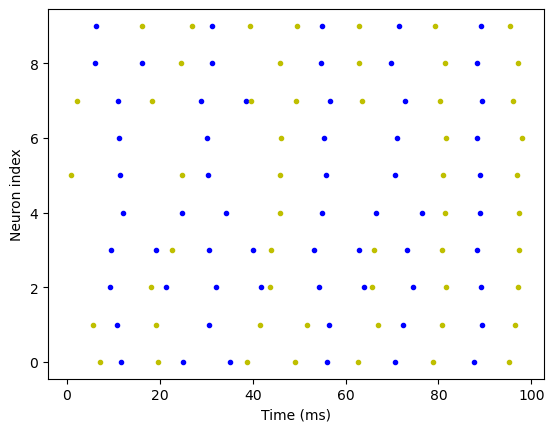

In [5]:
# From starter.ipynb
# Init all 10 neurons with random starting V, the groups G1 and G2 are connected with probability of 0.6 as in the paper
# (only inhibitory connections across the groups, no other connections)

start_scope()

exc = 0.1

G1 = NeuronGroup(10, eqs2, threshold='v>1', reset='v = 0', method='exact')
G2 = NeuronGroup(10, eqs2, threshold='v>1', reset='v = 0', method='exact')

G1.v = 'rand()'
G2.v = 'rand()'

S1 = Synapses(G1, G2, on_pre='v_post = out * (1-exp(-(tp * log(1/(1 - g*(v_post - exc)/curr)))/tp))')
S2 = Synapses(G2, G1, on_pre='v_post = out * (1-exp(-(tp * log(1/(1 - g*(v_post - exc)/curr)))/tp))')

S1.connect(p = 0.6)
S2.connect(p = 0.6)

M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)
Sp1 = SpikeMonitor(G1)
Sp2 = SpikeMonitor(G2)

run(100*ms)

plot(Sp1.t/ms, Sp1.i, '.b')
plot(Sp2.t/ms, Sp2.i, '.y')
xlabel('Time (ms)')
ylabel('Neuron index');

In [ ]:
# ISI Plotter (needs to be modded for this version with multiple neurons)
spikes = min(len(Sp2.t[:]), len(Sp1.t[:]))
Vals = Sp1.t[:spikes] - Sp2.t[:spikes]

plot(Sp1.t/ms, Vals/ms)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.axhline(y = 11/2, color = 'g', linestyle = '--')
xlabel('Time')
ylabel('Interspike Intervals')
ylim(-10, 10);